Epoch 1/100
704/704 [==============================] - 39s 50ms/step - loss: 1.6456 - accuracy: 0.4055 - val_loss: 1.6812 - val_accuracy: 0.3934
Epoch 2/100
704/704 [==============================] - 34s 49ms/step - loss: 1.2239 - accuracy: 0.5705 - val_loss: 1.7612 - val_accuracy: 0.4628
Epoch 3/100
704/704 [==============================] - 36s 51ms/step - loss: 1.0333 - accuracy: 0.6391 - val_loss: 1.0892 - val_accuracy: 0.6224
Epoch 4/100
704/704 [==============================] - 36s 51ms/step - loss: 0.8986 - accuracy: 0.6873 - val_loss: 1.3267 - val_accuracy: 0.5726
Epoch 5/100
704/704 [==============================] - 37s 52ms/step - loss: 0.8016 - accuracy: 0.7238 - val_loss: 1.0009 - val_accuracy: 0.6640
Epoch 6/100
704/704 [==============================] - 36s 51ms/step - loss: 0.7125 - accuracy: 0.7543 - val_loss: 1.4823 - val_accuracy: 0.5694
Epoch 7/100
704/704 [==============================] - 39s 56ms/step - loss: 0.6341 - accuracy: 0.7786 - val_loss: 1.3042 - val_ac

704/704 [==============================] - 34s 48ms/step - loss: 0.0690 - accuracy: 0.9823 - val_loss: 4.0254 - val_accuracy: 0.7164
Epoch 58/100
704/704 [==============================] - 35s 49ms/step - loss: 0.0689 - accuracy: 0.9826 - val_loss: 4.2647 - val_accuracy: 0.7042
Epoch 59/100
704/704 [==============================] - 34s 49ms/step - loss: 0.0729 - accuracy: 0.9823 - val_loss: 4.5143 - val_accuracy: 0.7134
Epoch 60/100
704/704 [==============================] - 35s 49ms/step - loss: 0.0703 - accuracy: 0.9828 - val_loss: 4.3099 - val_accuracy: 0.6992
Epoch 61/100
704/704 [==============================] - 34s 49ms/step - loss: 0.0694 - accuracy: 0.9828 - val_loss: 4.3091 - val_accuracy: 0.7092
Epoch 62/100
704/704 [==============================] - 35s 49ms/step - loss: 0.0725 - accuracy: 0.9825 - val_loss: 4.2011 - val_accuracy: 0.7174
Epoch 63/100
704/704 [==============================] - 35s 49ms/step - loss: 0.0716 - accuracy: 0.9822 - val_loss: 4.4744 - val_accuracy

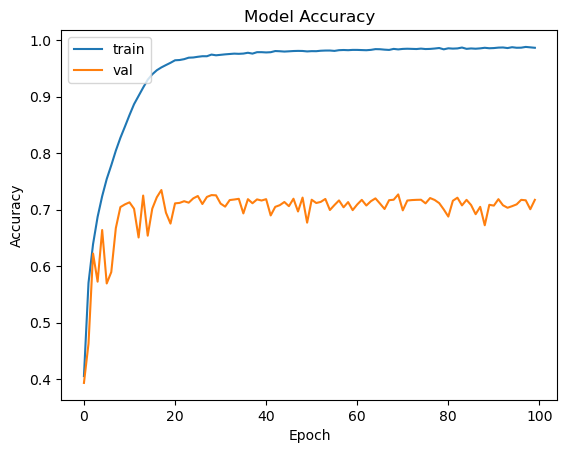

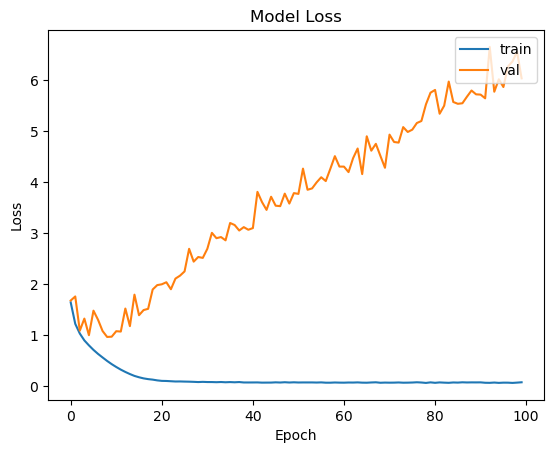

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the ConvNet model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Save the model
model.save('dsc650/assignments/assignment06/results/cifar10_model.h5')

# Save the predictions
y_pred = model.predict(x_test)
np.save('dsc650/assignments/assignment06/results/cifar10_predictions.npy', y_pred)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('dsc650/assignments/assignment06/results/accuracy_plot.png')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('dsc650/assignments/assignment06/results/loss_plot.png')
plt.show()
